<a href="https://colab.research.google.com/github/Deepak25khatri/Rs_Project2/blob/vikram/RS_CP2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_books = pd.read_csv('/content/drive/MyDrive/archive/Books.csv',
                       usecols = ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
                       low_memory=False)

df_ratings = pd.read_csv('/content/drive/MyDrive/archive/Ratings.csv')
df_users = pd.read_csv('/content/drive/MyDrive/archive/Users.csv')

### DATA CLEANING

In [ ]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
df_books.shape

(271360, 5)

In [ ]:
df_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

Since the null value columns are only a couple out of 270000+, deleting rows will lead to very negligible data loss. So it is sensible to delete rows with null values.

In [ ]:
df_books.dropna(inplace=True)

In [ ]:
df_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
df_ratings.shape

(1149780, 3)

In [ ]:
df_ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
df_users.shape

(278858, 3)

In [ ]:
df_users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Since this is a numeric column, we could fill the values with the average of the column, but that would lead to a majority of values with only 1 value, therefore we could add some variability to this, by assuming age is normally distributed around the mean. We can then take a range of one standard deviation below and above the mean and generate random values for the null cells.

In [ ]:
std = np.floor(df_users['Age'].std())
mean_age = np.floor(df_users['Age'].mean())
print(std, mean_age)

14.0 34.0


In [ ]:
age_dist =  np.random.randint(mean_age-std, mean_age+std+1, df_users['Age'].isnull().sum())
df_users.loc[df_users['Age'].isna(), 'Age'] = age_dist
df_users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
df_users.head(20)

,User-ID,Location,Age
0,1,"nyc, new york, usa",46.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",21.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",48.0
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",21.0
7,8,"timmins, ontario, canada",28.0
8,9,"germantown, tennessee, usa",40.0
9,10,"albacete, wisconsin, spain",26.0


### DATA ANALYSIS

First, we have to understand certain behaviors and tendencies of our dataset. We can analyze a number of factors.

Many behaviours of the users

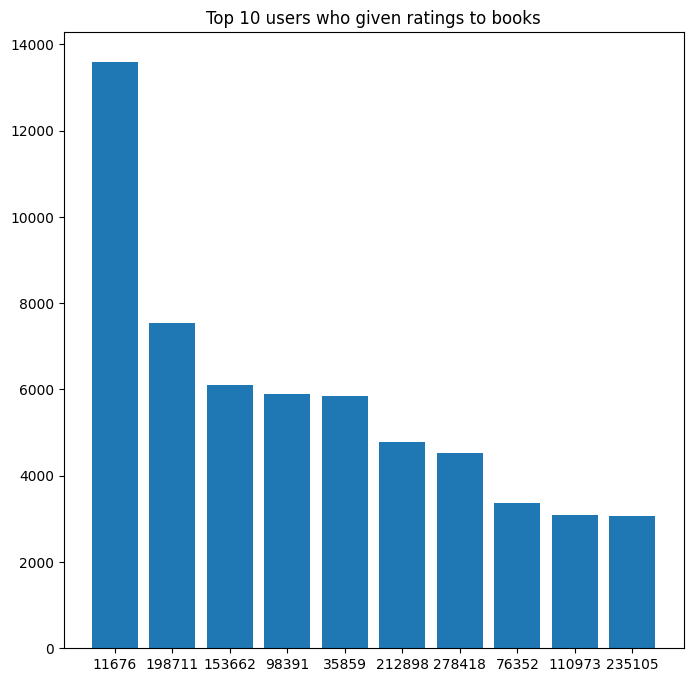

In [ ]:
u_r_counts = pd.DataFrame(df_ratings['User-ID'].value_counts()).reset_index().head(10)
u_r_counts['index'] = u_r_counts['index'].astype(str)
plt.figure(figsize = (8,8))
plt.bar(x='index', height='User-ID', data=u_r_counts)
plt.xlabel('User-ID')
plt.ylabel('Number of Ratings')
plt.title('Top 10 users who give ratings to books')
plt.show()

In [ ]:
full_counts = pd.DataFrame(df_ratings['User-ID'].value_counts()).reset_index()
twenty_percent = int(0.2*len(full_counts['index']))
df_20 = full_counts.head(twenty_percent)
ratings_20 = df_20['User-ID'].sum()
ratings_full = full_counts['User-ID'].sum()
print("20% of the users provide", round(ratings_20 / ratings_full * 100, 2),
      "of the ratings")
print("The common 80-20 principle is seen here. In fact, the proportion is around 8.73% more than 80-20")

20% of the users provide 88.73 of the ratings
The common 80-20 principle is seen here. In fact, the proportion is around 8.73% more than 80-20


In [ ]:
rated_users = df_users[df_users['User-ID'].isin(df_ratings['User-ID'])]
rated_users.reset_index(inplace=True)
rated_users.head()

,index,User-ID,Location,Age
0,1,2,"stockton, california, usa",18.0
1,6,7,"washington, dc, usa",21.0
2,7,8,"timmins, ontario, canada",28.0
3,8,9,"germantown, tennessee, usa",40.0
4,9,10,"albacete, wisconsin, spain",26.0


In [ ]:
for i in rated_users.index:
  rated_users.loc[i, 'country'] = rated_users.loc[i, 'Location'].split(',')[-1].strip()

rated_users

<ipython-input-168-da8ab35d41fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_users.loc[i, 'country'] = rated_users.loc[i, 'Location'].split(',')[-1].strip()


,index,User-ID,Location,Age,country
0,1,2,"stockton, california, usa",18.0,usa
1,6,7,"washington, dc, usa",21.0,usa
2,7,8,"timmins, ontario, canada",28.0,canada
3,8,9,"germantown, tennessee, usa",40.0,usa
4,9,10,"albacete, wisconsin, spain",26.0,spain
...,...,...,...,...,...
105278,278845,278846,"toronto, ontario, canada",23.0,canada
105279,278848,278849,"georgetown, ontario, canada",23.0,canada
105280,278850,278851,"dallas, texas, usa",33.0,usa
105281,278851,278852,"brisbane, queensland, australia",32.0,australia


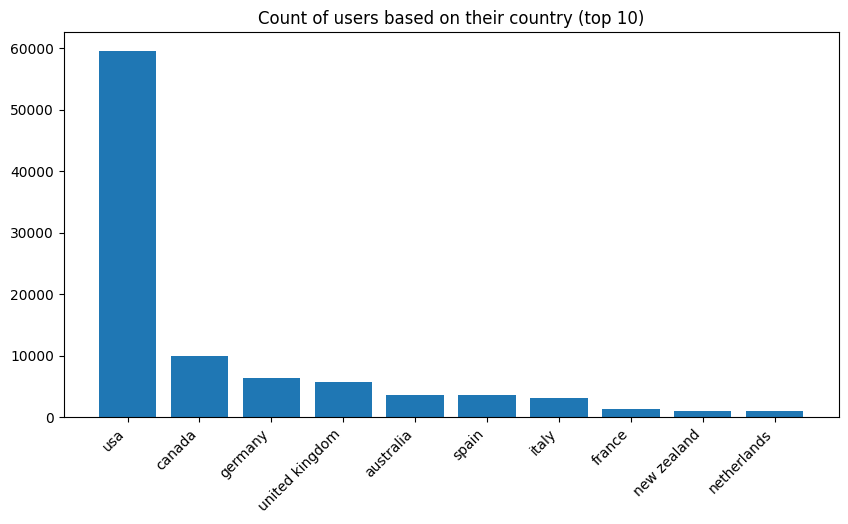

In [ ]:
countries = pd.DataFrame(rated_users['country'].value_counts()).reset_index().head(11)
countries['index'].replace('', np.nan, inplace=True)
countries.dropna(inplace=True)
plt.figure(figsize=(10,5))
plt.bar(x='index', height='country', data=countries)
plt.title('Count of users based on their country (top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

Next, we look at the books and patterns in their ratings.

In [ ]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
df_explicit = df_ratings[df_ratings['Book-Rating'] != 0]
df_book_dets = df_books.merge(df_explicit, how='left', on='ISBN')
df_avg_by_book = pd.DataFrame(df_book_dets.groupby('Book-Title')['Book-Rating'].mean()).reset_index()
df_avg_by_book.sort_values(by='Book-Rating', ascending=False, inplace=True)
top_books = df_avg_by_book['Book-Title'].head(10).tolist()
print("The top 10 rated books are:\n")
for i in top_books:
  print(i)


The top 10 rated books are:

The Art of Alice in Wonderland
Bertha Lum (American Printmakers)
Bernie Magruder and the Disappearing Bodies
One for the Morning Glory
The Greek Villa
The Twelve Days of Christmas : A Pop-Up Celebration
Bernardo Bellotto genannt Canaletto. Dresden im 18. Jahrhundert.
The Twelve Dogs Of Christmas
Eternal Treblinka: Our Treatment of Animals and the Holocaust
The Twelve Wild Swans : A Journey to the Realm of Magic, Healing, and Action


We can also get the top 10 authors and publishers

In [ ]:
df_avg_by_author = pd.DataFrame(df_book_dets.groupby('Book-Author')['Book-Rating'].mean()).reset_index()
df_avg_by_author.sort_values(by='Book-Rating', ascending=False, inplace=True)
top_authors = df_avg_by_author['Book-Author'].head(10).tolist()
print("The top 10 rated authors are:\n")
for i in top_authors:
  print(i)

The top 10 rated authors are:

 D. Chiel
Larry K. Brendtro
Larry Towell
Larry Sloman
Larry Sabato
Larry Nyhoff
Carole Ann Lee
Larry Lachman
Larry Keenan
Larry Fornia


In [ ]:
df_avg_by_publisher = pd.DataFrame(df_book_dets.groupby('Publisher')['Book-Rating'].mean()).reset_index()
df_avg_by_publisher.sort_values(by='Book-Rating', ascending=False, inplace=True)
top_publishers = df_avg_by_publisher['Publisher'].head(10).tolist()
print("The top 10 rated publishers are:\n")
for i in top_publishers:
  print(i)

The top 10 rated publishers are:

 Editions P. Terrail
St.Martin's
Boo's Publishing Company
Bonzobucks &amp; Books Pub
St Anthony Messenger Pr
Moon Pony Press
St. Andrew's Productions
St. Anthony Messenger P, US
St. Benno
Moon Mountain Publishing


Last but not least, we check for average ratings by year. This is a time series analysis of ratings over time.

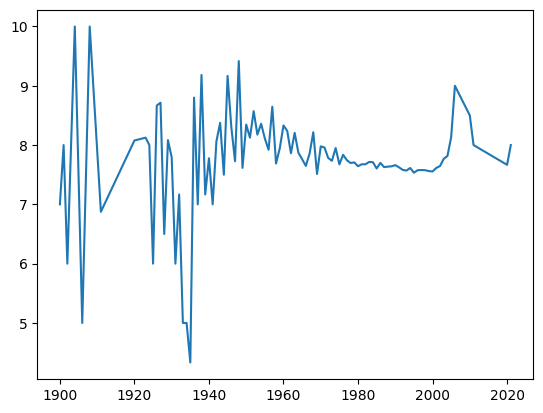

In [ ]:
df_avg_by_year = pd.DataFrame(df_book_dets.groupby('Year-Of-Publication')['Book-Rating'].mean()).reset_index()
df_avg_by_year.dropna(inplace=True)
df_avg_by_year['Year-Of-Publication'] = pd.to_numeric(df_avg_by_year['Year-Of-Publication'], errors='coerce')
df_avg_by_year.dropna(inplace=True)
df_avg_by_year['Year-Of-Publication'] = df_avg_by_year['Year-Of-Publication'].astype(int)
df_avg_by_year = df_avg_by_year[(df_avg_by_year['Year-Of-Publication'] >= 1900) & (df_avg_by_year['Year-Of-Publication'] <= 2023)]
plt.plot(df_avg_by_year['Year-Of-Publication'], df_avg_by_year['Book-Rating'])

Insights:

Early 1900s were a bit of a fluctuating time for books in terms of ratings. On one hand, we have the highest rated books since 1900, on the other hand we have the 2nd lowest ratings for books since 1900.

1930s: The books published during this time were generally not well received by the users. Easily the period with the lowest average ratings.

1940s to 1960s: There was an improvement in the quality of the books, according to the users. There was a signficant and yet consistent upwards trend of ratings during this time.

1960s to 2000: Once again fluctuating, but it was much less extreme than the early 1900s, but there was a very steady downwards trend for ratings.

2000 to 2010: A very sharp and sudden increase, followed by a similarly sharp and sudden decrease in the ratings.

2010 to 2021: A much more pronounced downward trend of ratings until the very end, with a pronounced upward trend.

From the 1950s, the average ratings of books has remained at around 8.0, so the users who have rated these books are generally pretty generous.